In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Create 'data' folder if not exists
os.makedirs("data", exist_ok=True)

# Prepare storage
all_reviews = []

# Loop through first 5 pages
for page_num in range(1, 6):
    if page_num == 1:
        url = "https://www.airlinequality.com/airline-reviews/british-airways/"
    else:
        url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{page_num}/"

    print(f"Scraping Page {page_num}: {url}")

    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        reviews = soup.find_all("article", class_=lambda value: value and value.startswith("review-"))

        for review in reviews:
            title_tag = review.find("h2", class_="text_header")
            rating_tag = review.find("span", itemprop="ratingValue")
            content_tag = review.find("div", class_="text_content")

            title = title_tag.get_text(strip=True) if title_tag else "No Title"
            rating = rating_tag.get_text(strip=True) if rating_tag else "No Rating"
            content = content_tag.get_text(strip=True) if content_tag else "No Content"

            all_reviews.append({
                "Title": title,
                "Rating": rating,
                "Review": content
            })

        time.sleep(2)

    except Exception as e:
        print(f"❌ Error on page {page_num}: {e}")

# Convert to DataFrame
df = pd.DataFrame(all_reviews)

# Double-check if reviews were collected
if df.empty:
    print("⚠️ No reviews were scraped. Try checking the selectors or your internet connection.")
else:
    # Save to CSV
    file_path = "data/british_airways_reviews.csv"
    df.to_csv(file_path, index=False)
    print(f"✅ Scraping done! File saved to: {file_path}")


Scraping Page 1: https://www.airlinequality.com/airline-reviews/british-airways/
Scraping Page 2: https://www.airlinequality.com/airline-reviews/british-airways/page/2/
Scraping Page 3: https://www.airlinequality.com/airline-reviews/british-airways/page/3/
Scraping Page 4: https://www.airlinequality.com/airline-reviews/british-airways/page/4/
Scraping Page 5: https://www.airlinequality.com/airline-reviews/british-airways/page/5/
✅ Scraping done! File saved to: data/british_airways_reviews.csv


In [ ]:
df

,Title,Rating,Review
0,"""our bags took a long time""",4,Not Verified| Check in was smooth enough. Boa...
1,“flight crew was welcoming and friendly”,8,✅Trip Verified| Although transferring to this ...
2,"""high level of professionalism""",10,✅Trip Verified| We are extremely grateful to...
3,“Horrendous Service”,3,✅Trip Verified| I had an appalling experienc...
4,"""cost of Club Europe is hard to justify""",6,"Not Verified| Good points, the cabin crew, th..."
5,"“well below that of Aegean""",6,"Not Verified| It was a decent flight, reasona..."
6,"""you can do better than this""",5,✅Trip Verified| I really like flying British...
7,"""downgraded to economy""",1,✅Trip Verified| Could not book online the ni...
8,“staff were really engaged”,7,✅Trip Verified| Having had some rough experien...
9,"""got it right on this flight""",9,✅Trip Verified| This comfortable flight was ...


In [ ]:
import pandas as pd

# Load the scraped data
df = pd.read_csv("data/british_airways_reviews.csv")

# Show first few rows
print(df.head())



                                      Title  Rating  \
0               "our bags took a long time"       4   
1  “flight crew was welcoming and friendly”       8   
2           "high level of professionalism"      10   
3                      “Horrendous Service”       3   
4  "cost of Club Europe is hard to justify"       6   

                                              Review  
0  Not Verified|  Check in was smooth enough. Boa...  
1  ✅Trip Verified| Although transferring to this ...  
2  ✅Trip Verified|   We are extremely grateful to...  
3  ✅Trip Verified|   I had an appalling experienc...  
4  Not Verified|  Good points, the cabin crew, th...  


In [ ]:
# Basic info to see
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   50 non-null     object
 1   Rating  50 non-null     int64 
 2   Review  50 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [ ]:
# Check for nulls
df.isnull().sum()

# Optionally drop rows with missing reviews
df.dropna(subset=['Review'], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)


In [ ]:
# Clean Review text
df['Review'] = df['Review'].str.strip().str.lower()

# Optional: remove punctuation (if needed for analysis)
import string
df['Review'] = df['Review'].str.replace(f"[{string.punctuation}]", "", regex=True)

print(df['Review'].head())


0    not verified  check in was smooth enough board...
1    ✅trip verified although transferring to this f...
2    ✅trip verified   we are extremely grateful to ...
3    ✅trip verified   i had an appalling experience...
4    not verified  good points the cabin crew they ...
Name: Review, dtype: object


In [ ]:
# Check unique ratings
print(df['Rating'].value_counts())

# Convert rating column to numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


Rating
1     19
9      8
7      5
3      4
10     3
4      3
5      3
8      2
6      2
2      1
Name: count, dtype: int64


In [ ]:
df.head()

,Title,Rating,Review,Sentiment
0,"""our bags took a long time""",4,not verified check in was smooth enough board...,0.048148
1,“flight crew was welcoming and friendly”,8,✅trip verified although transferring to this f...,0.297500
2,"""high level of professionalism""",10,✅trip verified we are extremely grateful to ...,0.058750
3,“Horrendous Service”,3,✅trip verified i had an appalling experience...,-0.056573
4,"""cost of Club Europe is hard to justify""",6,not verified good points the cabin crew they ...,0.048286


<ipython-input-14-baf15dd6ce38>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='coolwarm')


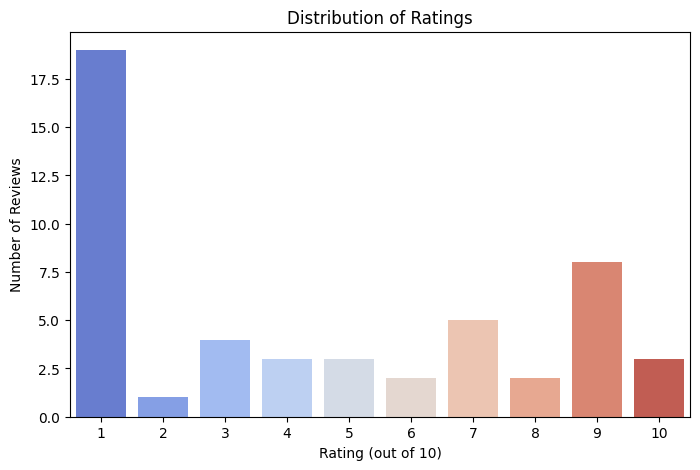

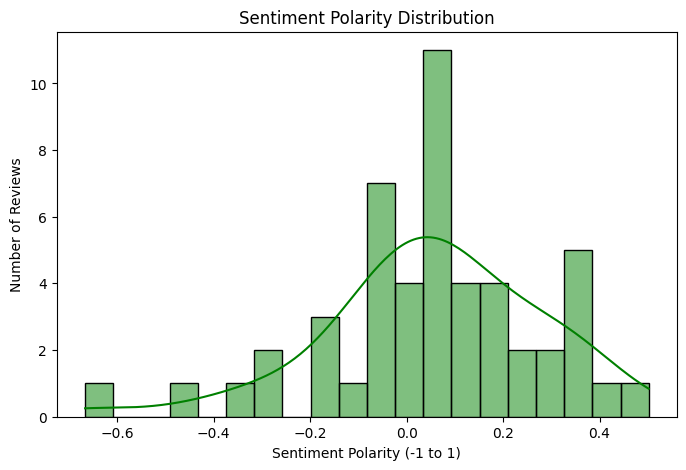

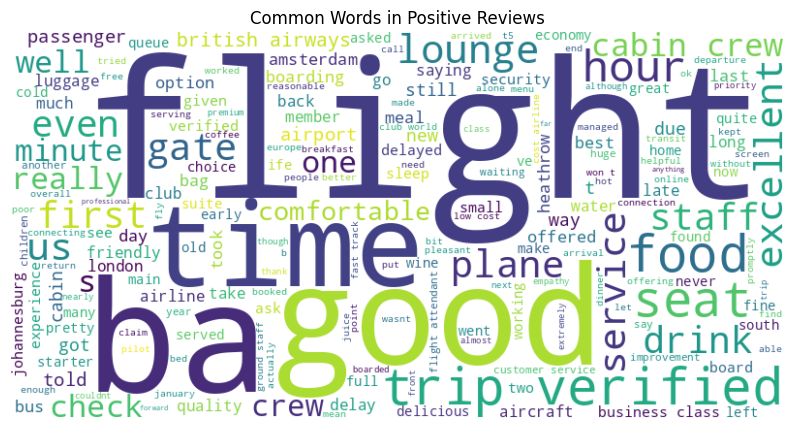

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

# Apply sentiment analysis
df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot rating distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=df, palette='coolwarm')
plt.title('Distribution of Ratings')
plt.xlabel('Rating (out of 10)')
plt.ylabel('Number of Reviews')
plt.show()

# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Sentiment'], bins=20, kde=True, color='green')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity (-1 to 1)')
plt.ylabel('Number of Reviews')
plt.show()

# Create a word cloud from positive reviews only
positive_reviews = " ".join(df[df['Sentiment'] > 0]['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Positive Reviews')
plt.show()


                                              Review  Sentiment
0  not verified  check in was smooth enough board...   0.048148
1  ✅trip verified although transferring to this f...   0.297500
2  ✅trip verified   we are extremely grateful to ...   0.058750
3  ✅trip verified   i had an appalling experience...  -0.056573
4  not verified  good points the cabin crew they ...   0.048286


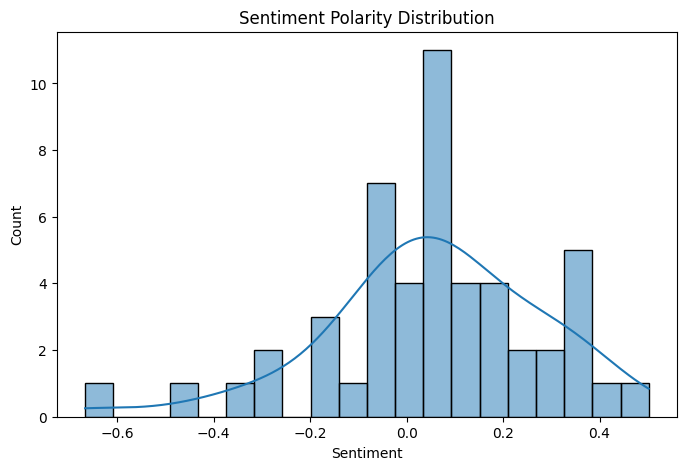

In [ ]:
from textblob import TextBlob

# Calculate polarity (-1 negative, 1 positive)
df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Quick look at sentiment scores
print(df[['Review', 'Sentiment']].head())

# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Sentiment'], bins=20, kde=True)
plt.title("Sentiment Polarity Distribution")
plt.show()


In [ ]:
import pandas as pd
df=pd.read_csv('/content/customer_booking_file.csv',encoding='latin-1')

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.shape

(49281, 14)

In [ ]:
df['booking_complete'].value_counts()

,count
booking_complete,
0,42522
1,7478


In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df.isna().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [ ]:
df.duplicated().sum()

np.int64(719)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


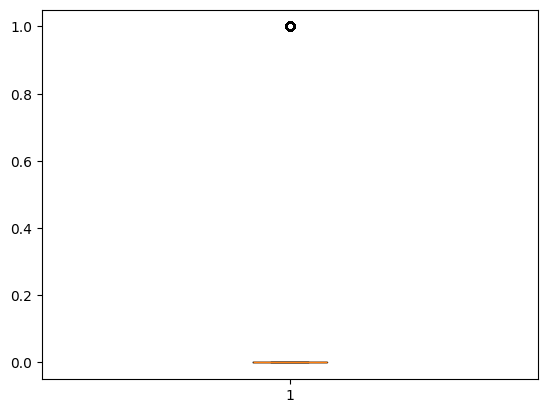

In [ ]:
plt.boxplot(df['booking_complete'])
plt.show()

In [ ]:
df.dropna()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#use onehotencoder
encoder=OneHotEncoder(sparse_output=False)

categorical_columns=['sales_channel'	,'trip_type','flight_day'	,'route','booking_origin']
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded,
                          columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)


In [ ]:
df_encoded.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2.0,262.0,19.0,7.0,1.0,0.0,0.0,5.52,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,112.0,20.0,3.0,0.0,0.0,0.0,5.52,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,243.0,22.0,17.0,1.0,1.0,0.0,5.52,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,96.0,31.0,4.0,0.0,0.0,1.0,5.52,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,68.0,22.0,15.0,1.0,0.0,1.0,5.52,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


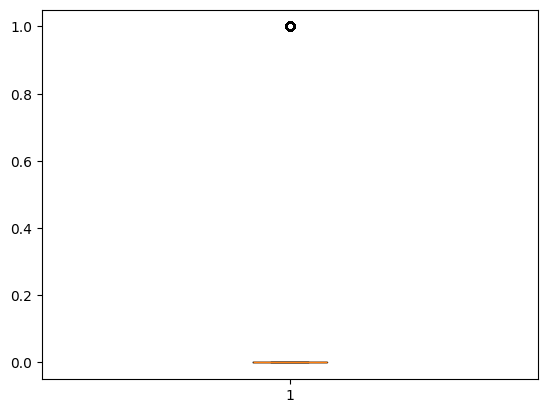

In [ ]:
plt.boxplot(df['booking_complete'])
plt.show()

In [ ]:
df_encoded['booking_complete'].isnull().sum()

np.int64(0)

In [ ]:
df_encoded.dropna(inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X=df_encoded.drop('booking_complete',axis=1)
y=df_encoded['booking_complete']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:

clf = RandomForestClassifier(n_estimators=100, max_depth=None,class_weight='balanced',
     random_state=0)


scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


np.float64(0.7183520937621959)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy=accuracy_score(y_test,y_pred)

In [ ]:
cm=confusion_matrix(y_test,y_pred,labels=[0,1])

In [ ]:
cr=classification_report(y_test,y_pred,target_names=['class0','class1'])

In [ ]:
print(f"accuracy is {accuracy} ")
print(f"confusion matrix is {cm}")
print(f"classification report:{cr}")

accuracy is 0.842923314462172 
confusion matrix is [[8125  109]
 [1417   64]]
classification report:              precision    recall  f1-score   support

      class0       0.85      0.99      0.91      8234
      class1       0.37      0.04      0.08      1481

    accuracy                           0.84      9715
   macro avg       0.61      0.51      0.50      9715
weighted avg       0.78      0.84      0.79      9715



In [ ]:
import numpy as np

In [ ]:
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

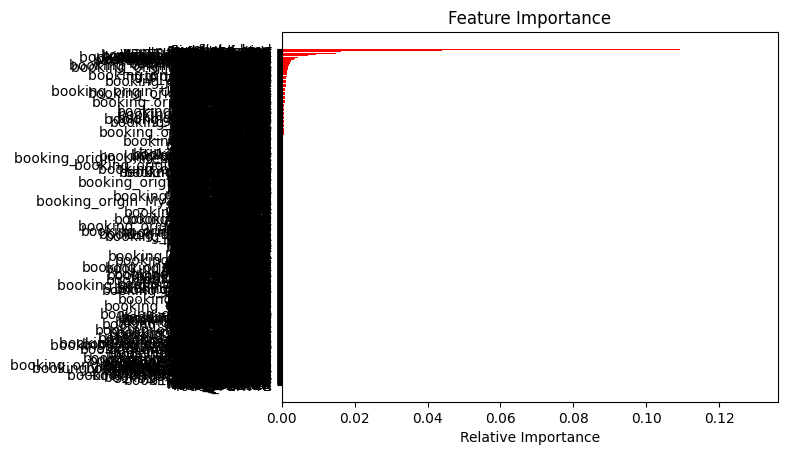

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

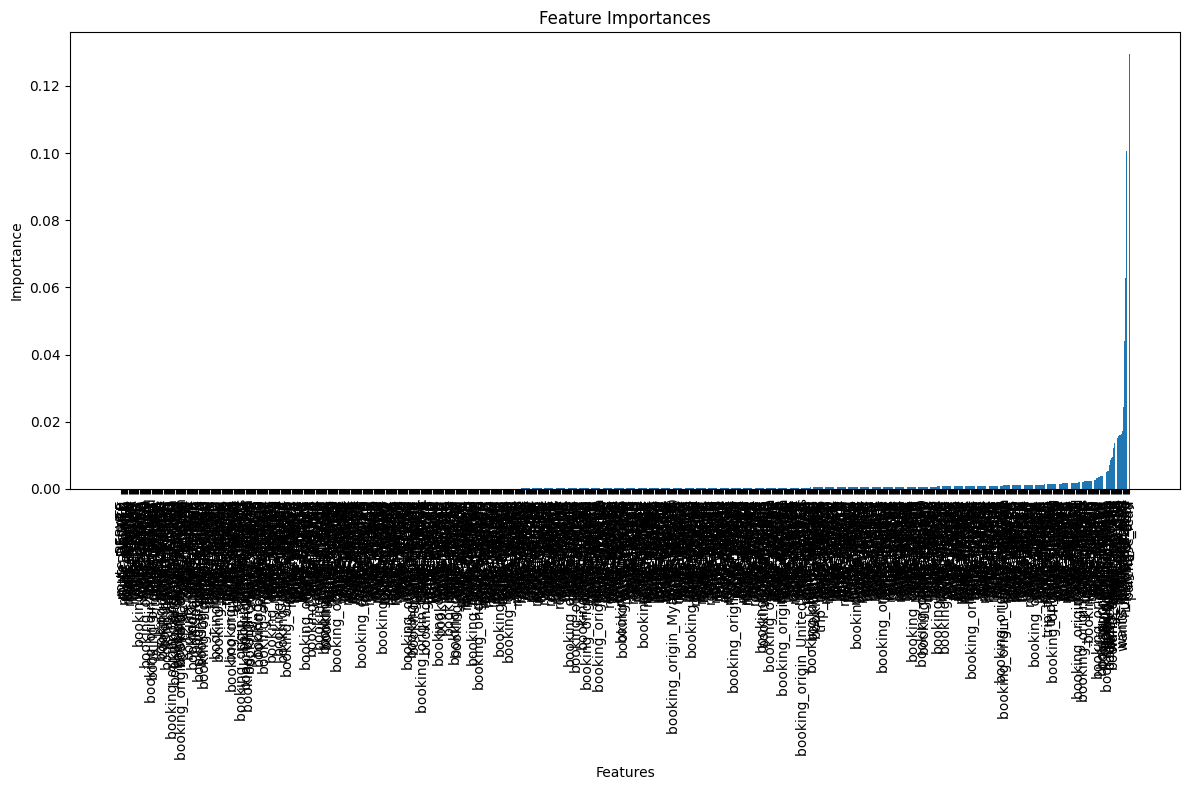

In [ ]:
plt.figure(figsize=(12, 8)) # Increase figure size for better readability
plt.bar(features[indices], importances[indices]) # Plot sorted importances
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

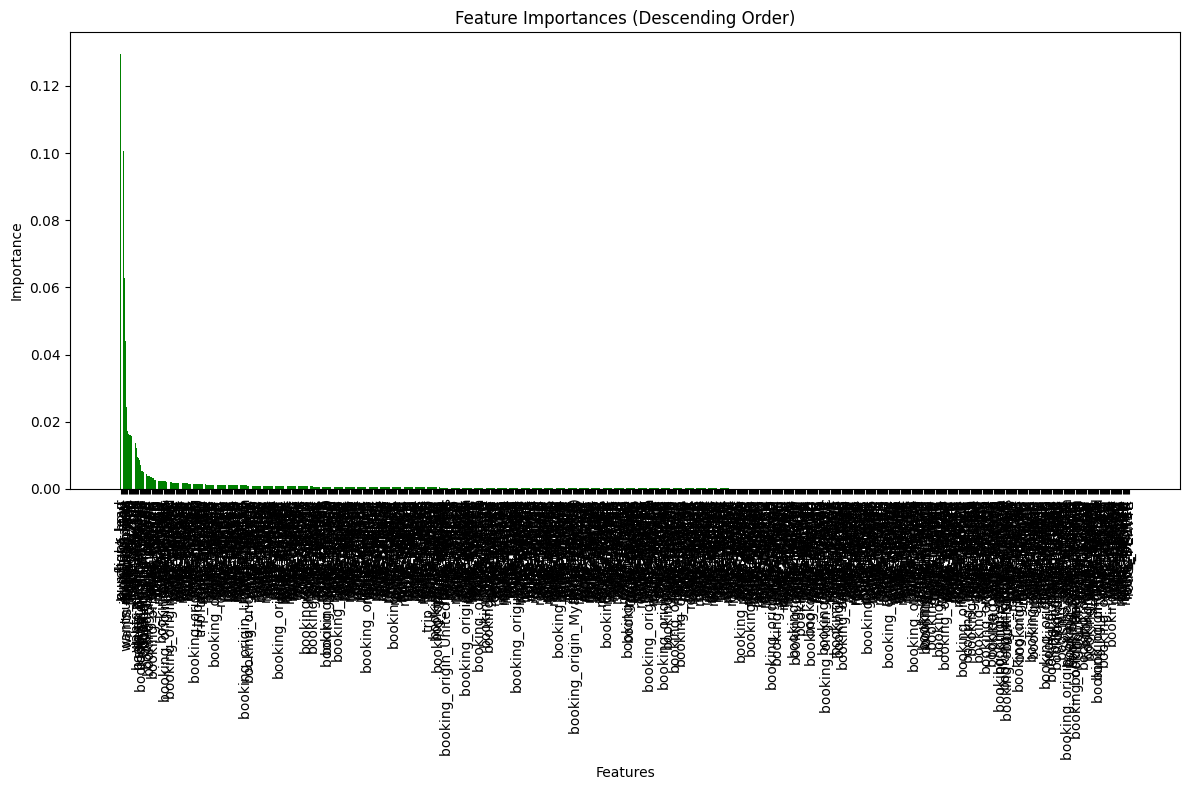

In [ ]:
# Properly sort features and importances
sorted_idx = np.argsort(importances)[::-1]  # descending order

# Create sorted lists
sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(12, 8))
plt.bar(sorted_features, sorted_importances, color='green')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances (Descending Order)')
plt.tight_layout()
plt.show()


(50000, 14)
booking_complete
0    42522
1     7478
Name: count, dtype: int64
       num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
m

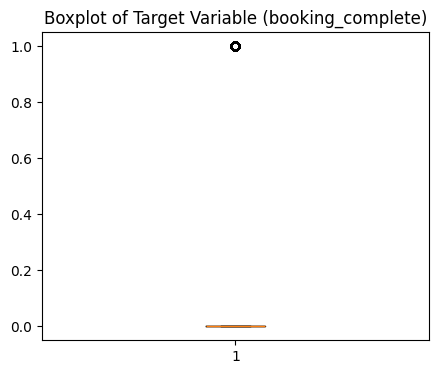

ValueError: Input y contains NaN.

In [ ]:
# 🧹 1. Import Libraries & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
df = pd.read_csv('/content/customer_booking_file.csv', encoding='latin-1')

# 🧼 2. Data Cleaning & Exploration
print(df.shape)
print(df['booking_complete'].value_counts())
print(df.describe())
print(df.info())
print(df.isna().sum())
print("Duplicates:", df.duplicated().sum())

# Drop duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# 🧠 3. Visualize Booking Distribution
plt.figure(figsize=(5, 4))
plt.boxplot(df['booking_complete'])
plt.title("Boxplot of Target Variable (booking_complete)")
plt.show()

# 🛠️ 4. Encode Categorical Variables
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

# Combine with original dataframe
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# 🧪 5. Define Features and Target
X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']

# 🔀 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 7. Train RandomForest Classifier (Handling Class Imbalance)
clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=0)
clf.fit(X_train, y_train)

# 🔍 8. Cross-Validation
cv_scores = cross_val_score(clf, X, y, cv=5)
print(f"Cross-Validation Accuracy (mean): {cv_scores.mean():.4f}")

# 🎯 9. Predictions and Evaluation
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
cr = classification_report(y_test, y_pred, target_names=['No Booking (0)', 'Booking (1)'])

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# 📊 10. Feature Importance Plot (Sorted and Clean)
importances = clf.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]

# Horizontal bar chart
plt.figure(figsize=(10, 12))
plt.barh(sorted_features[::-1], sorted_importances[::-1], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance (Descending)")
plt.tight_layout()
plt.show()

# Vertical bar chart
plt.figure(figsize=(14, 6))
plt.bar(sorted_features, sorted_importances, color='green')
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances (Top Predictors)")
plt.tight_layout()
plt.show()


(50000, 14)
booking_complete
0    42522
1     7478
Name: count, dtype: int64
       num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
m

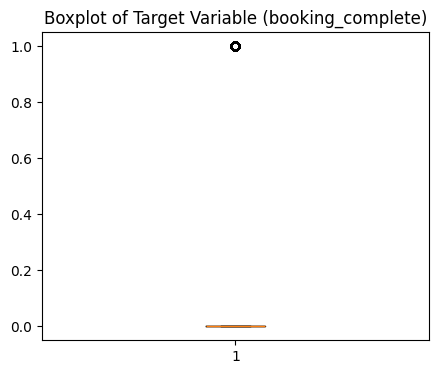

Cross-Validation Accuracy (mean): 0.7565
Accuracy: 0.8473
Confusion Matrix:
 [[8221  157]
 [1348  131]]
Classification Report:
                 precision    recall  f1-score   support

No Booking (0)       0.86      0.98      0.92      8378
   Booking (1)       0.45      0.09      0.15      1479

      accuracy                           0.85      9857
     macro avg       0.66      0.53      0.53      9857
  weighted avg       0.80      0.85      0.80      9857



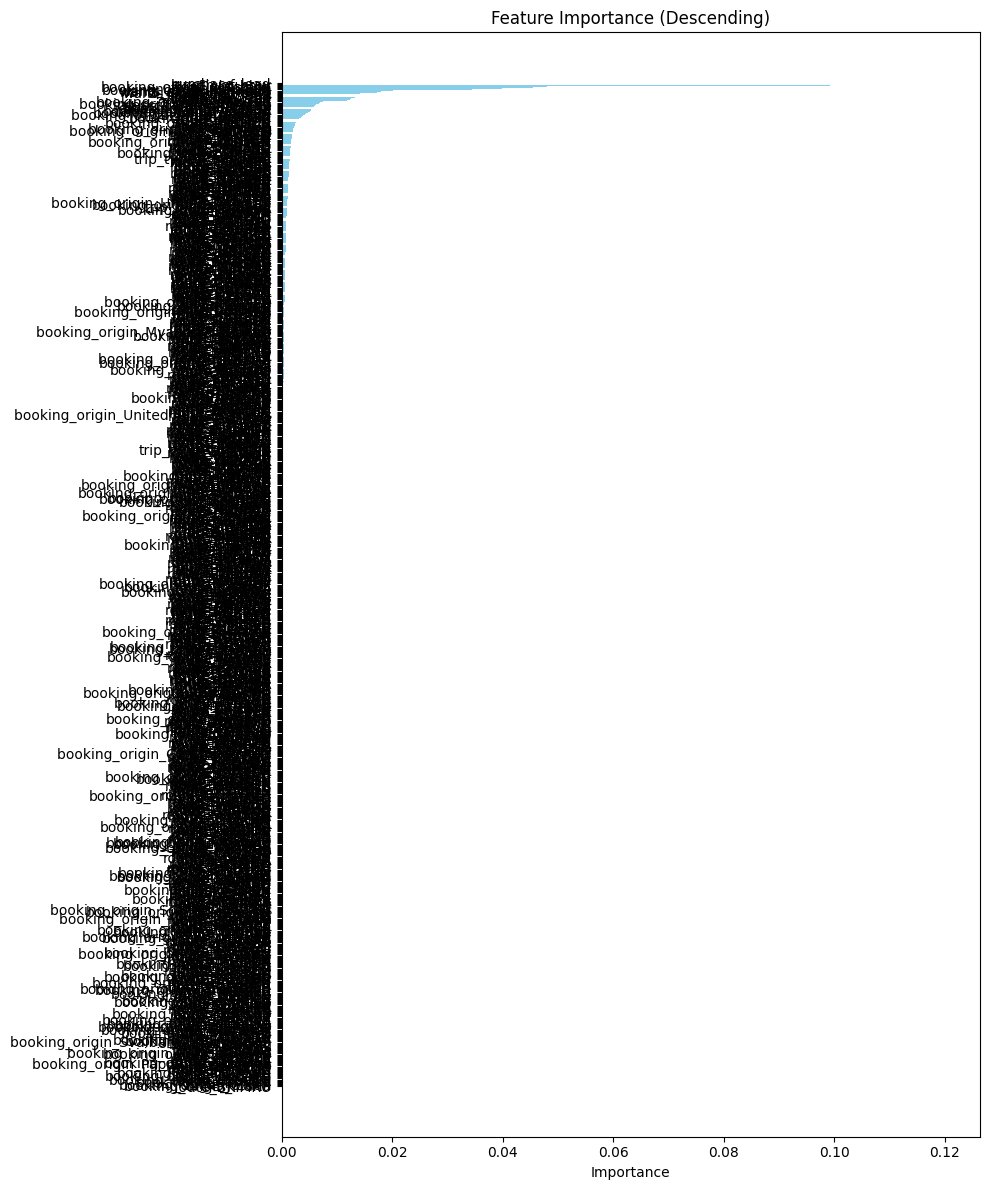

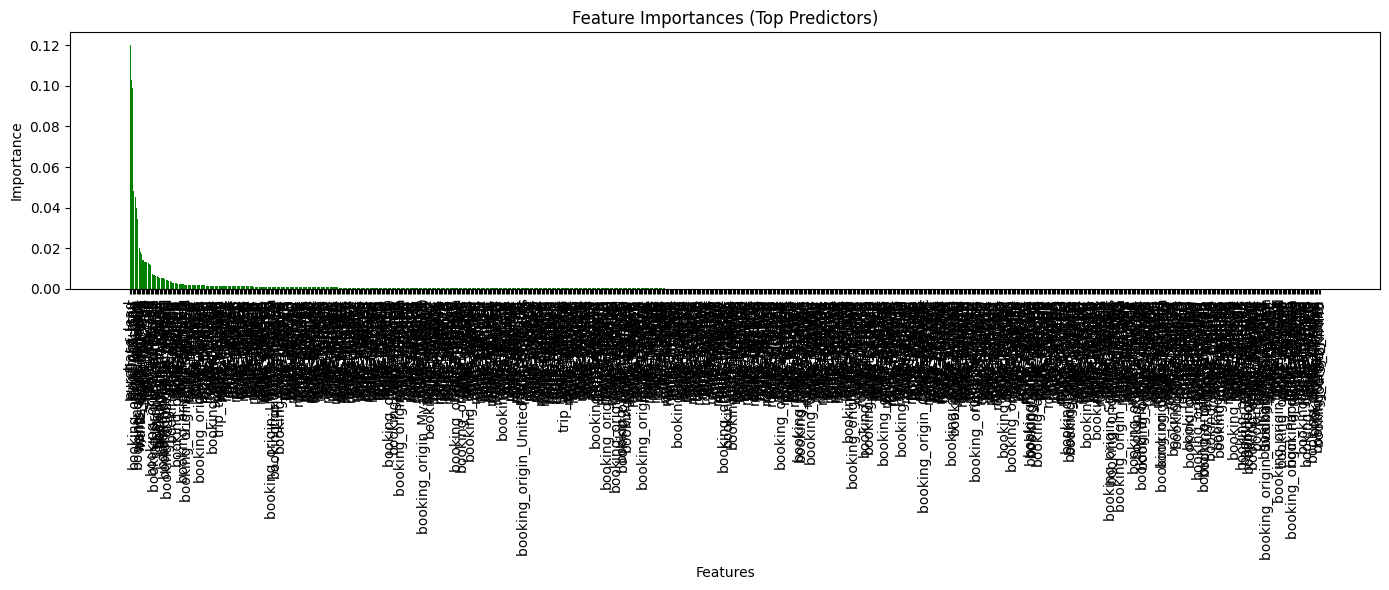

In [ ]:
# 🧹 1. Import Libraries & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
df = pd.read_csv('/content/customer_booking_file.csv', encoding='latin-1')

# 🧼 2. Data Cleaning & Exploration
print(df.shape)
print(df['booking_complete'].value_counts())
print(df.describe())
print(df.info())
print(df.isna().sum())
print("Duplicates:", df.duplicated().sum())

# Drop duplicates from original dataframe
df.drop_duplicates(inplace=True)
# We will drop rows with NaNs after encoding to ensure alignment

# 🧠 3. Visualize Booking Distribution
plt.figure(figsize=(5, 4))
# Check if 'booking_complete' has non-numeric values or NaNs before plotting
if pd.api.types.is_numeric_dtype(df['booking_complete']) and df['booking_complete'].notna().all():
    plt.boxplot(df['booking_complete'])
    plt.title("Boxplot of Target Variable (booking_complete)")
    plt.show()
else:
    print("Skipping boxplot for 'booking_complete' due to non-numeric or missing values.")


# 🛠️ 4. Encode Categorical Variables
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Use .loc to avoid SettingWithCopyWarning and ensure we are working on a copy if needed
df_temp = df.copy() # Create a copy to avoid modifying the original df unintentionally if subsequent operations on df_temp were inplace
encoded_array = encoder.fit_transform(df_temp[categorical_columns])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns), index=df_temp.index) # Keep original index


# Combine with original dataframe, dropping original categorical columns
df_encoded = pd.concat([df_temp.drop(categorical_columns, axis=1), encoded_df], axis=1)

# 🧼 Ensure no NaNs are present AFTER encoding and concatenation
# This is the critical step to address the ValueError
initial_nan_count = df_encoded.isna().sum().sum()
if initial_nan_count > 0:
    print(f"Warning: {initial_nan_count} NaNs found after encoding. Dropping rows with NaNs.")
    df_encoded.dropna(inplace=True)
    print(f"Remaining rows after dropping NaNs: {df_encoded.shape[0]}")


# 🧪 5. Define Features and Target
X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']

# Check for NaNs in X and y again before splitting
if X.isnull().sum().sum() > 0:
    print("Error: NaNs still found in features (X) before splitting.")
if y.isnull().sum().sum() > 0:
     print("Error: NaNs still found in target (y) before splitting.")


# 🔀 6. Train-Test Split
# train_test_split will also check for consistency in NaN presence, but we handle it before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 7. Train RandomForest Classifier (Handling Class Imbalance)
clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=0)
clf.fit(X_train, y_train) # This should now work as y_train should not contain NaNs

# 🔍 8. Cross-Validation
# Cross-validation also expects no NaNs, so use the cleaned X and y
cv_scores = cross_val_score(clf, X, y, cv=5)
print(f"Cross-Validation Accuracy (mean): {cv_scores.mean():.4f}")

# 🎯 9. Predictions and Evaluation
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
cr = classification_report(y_test, y_pred, target_names=['No Booking (0)', 'Booking (1)'])

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

# 📊 10. Feature Importance Plot (Sorted and Clean)
importances = clf.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]

# Horizontal bar chart
plt.figure(figsize=(10, 12))
plt.barh(sorted_features[::-1], sorted_importances[::-1], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance (Descending)")
plt.tight_layout()
plt.show()

# Vertical bar chart
plt.figure(figsize=(14, 6))
plt.bar(sorted_features, sorted_importances, color='green')
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances (Top Predictors)")
plt.tight_layout()
plt.show()